# Analysis of Parkinsons Hand writing test

Dataset is delimited as CSV values as follows;

X ; Y; Z; Pressure; GripAngle; Timestamp; Test ID

----------------
Test ID: 
- 0: Static Spiral Test ( Draw on the given spiral pattern)
- 1: Dynamic Spiral Test ( Spiral pattern will blink in a certain time, so subjects need to continue on their draw)
- 2: Circular Motion Test (Subjectd draw circles around the red point)

Data Set Information:

The PD and control handwriting database consists of 62 PWP (People with parkinson) and 15 healthy individuals who appealed at the Department of Neurology in Cerrahpasa Faculty of Medicine, Istanbul University. From all subjects, three types of handwriting recordings (Static Spiral Test (SST), Dynamic Spiral Test (DST) and Stability Test on Certain Point (STCP)) are taken. Also the drawings of spirals belongs to the PWP are included in the dataset as image. Therefore, this dataset can also be used for regression. 

Handwriting dataset was constructed using Wacom Cintiq 12WX graphics (Hahne et al., 2009) table. It is basically a graphics tablet and LCD monitor rolled into one. It enables to display a PC's screen on its monitor and only interacts with digitized pens. Special software was designed for recording handwriting drawings and testing the coordination of the PD patients using the recordings. The software uses API functions of the device and was developed in C# platform which can be run on Windows systems You can contact with the authors to request the software which is mentioned [1]. 




In this study, there are three different kinds of tests developed for the data collection via graphics tablet. 

The first one isthe Static Spiral Test (SST) which is frequently used for clinical research in the literature for different purposes like determining motor performance (Wang et al., 2008), measuring tremor (Pullman, 1998) and diagnosing PD (Saunders et al., 2008). In this test, three wound Archimedean spirals appears on the graphics tablet using the software and patients were asked to retrace the same spiral as much as they can using the digital pen. During the test, the features which are mentioned above and the other data to specify the patient are recorded to the database. 

The second test is the Dynamic Spiral Test (DST). Unlike SST, Archimedean spiral just appears and disappears in certain time intervals, in other words the Archimedean spiral blinks. This forces the patient to keep the pattern in mind and continue to draw. The purpose of this test is to determine the change in patient's drawing performance and pause times since it is more difficult to retrace the Archimedean spiral in this case. As a result of this test, it is observed that most of the patients continued drawing but nearly all of them lost the pattern. 

The third test is Stability Test on Certain Point (STCP). In this test, there is a certain red point in the middle of the screen and the subjects are asked to hold the digital pen on the point without touching the screen in a certain time. The purpose of this test is to determine the patient's hand stability or hand tremor level. 

Attribute Information:

'data' file contains the handwriting dataset. In this file there is two different folder that contains two different groups of handwriting samples which are called PWP (People with Parkinson's) and Healthy.

Problem:
In 2015, Parkinson's disease (PD) affected 6.2 million people and resulted in about 117,400 deaths globally. PD is a long-term degenerative disorder of the central nervous system that mainly affects the motor system.  The symptoms generally come on slowly over time. Early in the disease, the most obvious are shaking, rigidity, slowness of movement, and difficulty with walking.

Client:
The at-risk demographic are those aged over 60 and do not have access to frequent medical attention.

Data:
The dataset is from the UCI Machine Learning Repository donated in 2017. The data consists of 62 PWP (People with Parkinson) and 15 healthy individuals. Three types of recordings (Static Spiral Test, Dynamic Spiral Test and Stability Test) are taken. https://archive.ics.uci.edu/ml/datasets/Parkinson+Disease+Spiral+Drawings+Using+Digitized+Graphics+Tablet


1.Isenkul, M.E.; Sakar, B.E.; Kursun, O. . 'Improved spiral test using digitized graphics tablet for monitoring Parkinson's disease.' The 2nd International Conference on e-Health and Telemedicine (ICEHTM-2014), pp. 171-175, 2014. 

2.Erdogdu Sakar, B., Isenkul, M., Sakar, C.O., Sertbas, A., Gurgen, F., Delil, S., Apaydin, H., Kursun, O., 'Collection and Analysis of a Parkinson Speech Dataset with Multiple Types of Sound Recordings', IEEE Journal of Biomedical and Health Informatics, vol. 17(4), pp. 828-834, 2013.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import 25 files from parkinson folder

In [2]:
import glob, os
files = glob.glob('hw_dataset//parkinson//*.txt')
dfs = [pd.read_csv(fp, header=None, delimiter=';').assign(New=os.path.basename(fp).split('.')[0]) for fp in files]
df_p = pd.concat(dfs, ignore_index=True)
print(df_p.head())

     0    1  2   3     4        5  6         New
0  213  205  0  15  1440  1351716  0  P_02100001
1  213  205  0  47  1440  1351725  0  P_02100001
2  213  205  0  68  1440  1351734  0  P_02100001
3  213  205  0  84  1420  1351743  0  P_02100001
4  214  205  0  88  1440  1351752  0  P_02100001


In [4]:
columns = ['X','Y','Z','pressure', 'grip_angle','timestamp','test_ID','subject_ID']
df_p.columns = columns
df_p.head()

,X,Y,Z,pressure,grip_angle,timestamp,test_ID,subject_ID
0,213,205,0,15,1440,1351716,0,P_02100001
1,213,205,0,47,1440,1351725,0,P_02100001
2,213,205,0,68,1440,1351734,0,P_02100001
3,213,205,0,84,1420,1351743,0,P_02100001
4,214,205,0,88,1440,1351752,0,P_02100001


In [5]:
len(df)

202659

How many subject IDs
How many NaNs

In [6]:
df_p['subject_ID'].unique()

array(['P_02100001', 'P_02100002', 'P_05060003', 'P_05060004',
       'P_09100001', 'P_09100003', 'P_09100005', 'P_11120003',
       'P_11120004', 'P_11120005', 'P_12060001', 'P_12060002',
       'P_16100003', 'P_16100004', 'P_23100002', 'P_23100003',
       'P_26060001', 'P_26060002', 'P_26060003', 'P_26060006',
       'P_26060007', 'P_27110001', 'P_27110003', 'P_30100001', 'P_30100002'], dtype=object)

# Control Group; 15 files

In [9]:
import glob, os
files = glob.glob('hw_dataset//control//*.txt')
dfs = [pd.read_csv(fp, header=None, delimiter=';').assign(New=os.path.basename(fp).split('.')[0]) for fp in files]
df_c = pd.concat(dfs, ignore_index=True)
df_c.columns = columns
print(df_c.head())

     X    Y  Z  pressure  grip_angle   timestamp  test_ID subject_ID
0  200  204  0        73         910  1732647300        0     C_0001
1  200  204  0       218         900  1732647307        0     C_0001
2  200  204  0       253         900  1732647314        0     C_0001
3  200  204  0       304         900  1732647321        0     C_0001
4  200  204  0       351         900  1732647328        0     C_0001


In [19]:
len(control_df['subject_ID'].unique())

15

# Import 37 parksinsons files from new dataset

In [11]:
import glob, os
files = glob.glob('new_dataset//parkinson//*.txt')
dfs = [pd.read_csv(fp, header=None, delimiter=';').assign(New=os.path.basename(fp).split('.')[0]) for fp in files]
df_p2 = pd.concat(dfs, ignore_index=True)
df_p2.columns = columns
print(df_p2.head())

     X    Y  Z  pressure  grip_angle  timestamp  test_ID   subject_ID
0  201  200  0        20         880   68140147        0  H_P000-0001
1  201  200  0        86         900   68140154        0  H_P000-0001
2  201  200  0       123         900   68140161        0  H_P000-0001
3  201  200  0       146         900   68140168        0  H_P000-0001
4  201  200  0       158         900   68140175        0  H_P000-0001


In [22]:
len(df_p2['subject_ID'].unique())

37

In [13]:
df_p2['subject_ID'].unique()

array(['H_P000-0001', 'H_P000-0002', 'H_P000-0003', 'H_P000-0004',
       'H_P000-0007', 'H_P000-0008', 'H_p000-0010', 'H_P000-0011',
       'H_P000-0012', 'H_P000-0013', 'H_P000-0014', 'H_P000-0015',
       'H_P000-0016', 'H_p000-0017', 'H_p000-0018', 'H_P000-0019',
       'H_P000-0020', 'H_P000-0021', 'H_P000-0022', 'H_P000-0023',
       'H_P000-0024', 'H_P000-0025', 'H_p000-0028', 'H_P000-0029',
       'H_P000-0030', 'H_P000-0031', 'H_P000-0032', 'H_P000-0033',
       'H_P000-0034', 'H_P000-0035', 'H_P000-0036', 'H_P000-0037',
       'H_P000-0039', 'H_P000-0040', 'H_p000-0041', 'H_p000-0042',
       'H_p000-0043'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: num must be 1 <= num <= 24, not 25

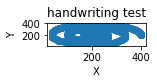

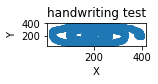

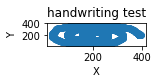

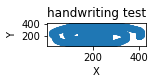

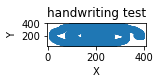

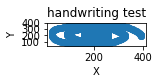

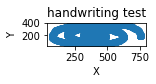

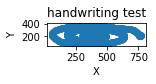

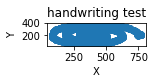

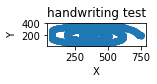

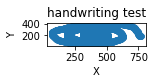

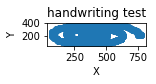

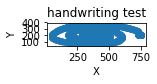

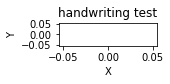

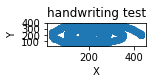

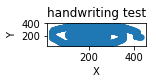

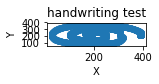

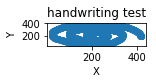

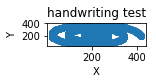

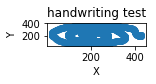

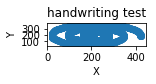

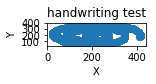

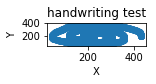

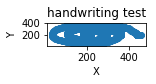

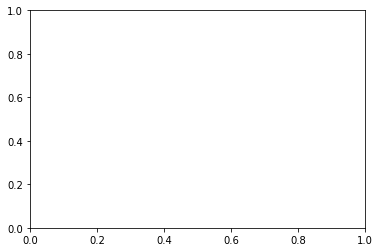

In [70]:
for i,subject in enumerate(df_p2['subject_ID'].unique()):
    X = df_p2['X'][(df_p2['subject_ID']==subject ) & (df_p2['test_ID']==0)]
    Y = df_p2['Y'][(df_p2['subject_ID']==subject ) & (df_p2['test_ID']==0)]

    
   # Y = df_p.iloc[i]
   # X = np.arange(len(Y)) 
    f, axs = plt.subplots()
    
    plt.subplot(8,3,i+1)
    
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.title('handwriting test')
    plt.scatter(X,Y, linewidth=.3)

plt.show();    

---

## Parkison patient ID 0043; test 0, test 1 and test 2

drawing visible spiral

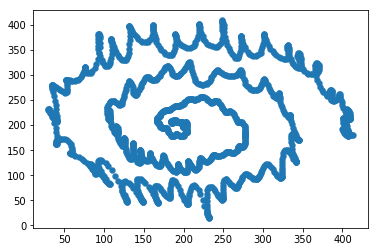

In [56]:
X = df_p2['X'][(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==0)]
Y = df_p2['Y'][(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==0)]
plt.scatter(x=X,y=Y, linewidth=.3);

drawing intermitently visible spiral

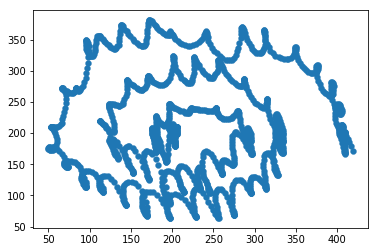

In [83]:
X = df_p2['X'][(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==1)]
Y = df_p2['Y'][(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==1)]
plt.scatter(x=X,y=Y, linewidth=.3);

testing hand stability

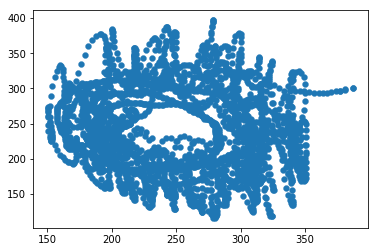

In [80]:
X = df_p2['X'][(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==2)]
Y = df_p2['Y'][(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==2)]
plt.scatter(x=X,y=Y, linewidth=.3);

## Parkison patient ID 0041; test 0, test 1 and test 2

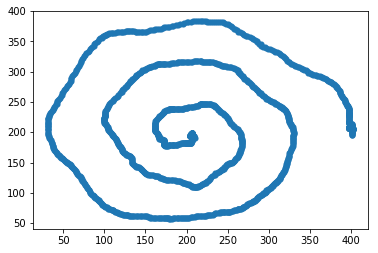

In [67]:
X = df_p2['X'][(df_p2['subject_ID']=='H_p000-0041') & (df_p2['test_ID']==0)]
Y = df_p2['Y'][(df_p2['subject_ID']=='H_p000-0041') & (df_p2['test_ID']==0)]
plt.scatter(x=X,y=Y, linewidth=.1);

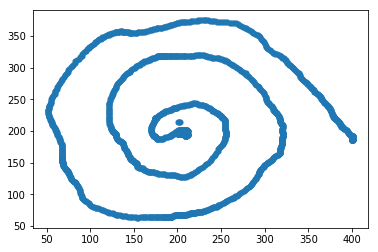

In [76]:
X = df_p2['X'][(df_p2['subject_ID']=='H_p000-0041') & (df_p2['test_ID']==1)]
Y = df_p2['Y'][(df_p2['subject_ID']=='H_p000-0041') & (df_p2['test_ID']==1)]
plt.scatter(x=X,y=Y, linewidth=.1);

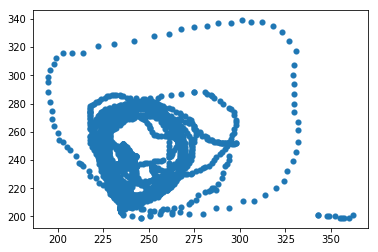

In [84]:
X = df_p2['X'][(df_p2['subject_ID']=='H_p000-0041') & (df_p2['test_ID']==2)]
Y = df_p2['Y'][(df_p2['subject_ID']=='H_p000-0041') & (df_p2['test_ID']==2)]
plt.scatter(x=X,y=Y, linewidth=.1);

## Control Group Example; test 0 and test 1

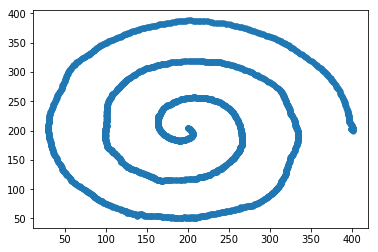

In [72]:
X = df_c['X'][(df_c['subject_ID']=='C_0001') & (df_c['test_ID']==0)]
Y = df_c['Y'][(df_c['subject_ID']=='C_0001') & (df_c['test_ID']==0)]
plt.scatter(x=X,y=Y, linewidth=.1);

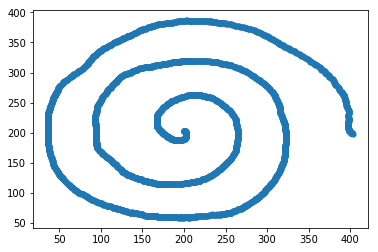

In [77]:
X = df_c['X'][(df_c['subject_ID']=='C_0001') & (df_c['test_ID']==1)]
Y = df_c['Y'][(df_c['subject_ID']=='C_0001') & (df_c['test_ID']==1)]
plt.scatter(x=X,y=Y, linewidth=.1);

### Create function to reduce X&Y into variations from center

In [90]:
def euc (x,y,mean_x,mean_y):
    """returns the euclidean position from mean from X and Y"""
    return np.sqrt((x-mean_x)**2+(y-mean_y)**2)

Look at one parkinsons sample as time series of how much shake 

In [97]:
df_sample1 = df_p2[(df_p2['subject_ID']=='H_p000-0043') & (df_p2['test_ID']==0)]

In [98]:
df_sample1.head()

,X,Y,Z,pressure,grip_angle,timestamp,test_ID,subject_ID
195335,201,202,0,163,830,1374859677,0,H_p000-0043
195336,201,202,0,181,830,1374859684,0,H_p000-0043
195337,201,201,0,194,830,1374859691,0,H_p000-0043
195338,201,201,0,188,830,1374859698,0,H_p000-0043
195339,200,200,0,181,830,1374859705,0,H_p000-0043


In [100]:
mean_x = df_sample1['X'].mean()
mean_y = df_sample1['Y'].mean()
print(f'mean x = {mean_x}, mean y = {mean_y}')

mean x = 210.04806629834255, mean y = 210.5745856353591


In [102]:
df_sample1['euc']= df_sample1.apply(lambda row: euc(row['X'], row['Y'],mean_x,mean_y), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_sample1.head()

,X,Y,Z,pressure,grip_angle,timestamp,test_ID,subject_ID,euc
195335,201,202,0,163,830,1374859677,0,H_p000-0043,12.465594
195336,201,202,0,181,830,1374859684,0,H_p000-0043,12.465594
195337,201,201,0,194,830,1374859691,0,H_p000-0043,13.173466
195338,201,201,0,188,830,1374859698,0,H_p000-0043,13.173466
195339,200,200,0,181,830,1374859705,0,H_p000-0043,14.587169


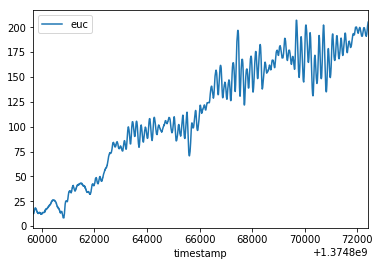

In [104]:
df_sample1.plot(x='timestamp', y='euc');

In [131]:
df_s1 = df_sample1[['euc']]

In [132]:
df_s1.T

,195335,195336,195337,195338,195339,195340,195341,195342,195343,195344,...,197135,197136,197137,197138,197139,197140,197141,197142,197143,197144
euc,12.465594,12.465594,13.173466,13.173466,14.587169,15.327579,15.327579,16.096082,16.888843,16.888843,...,192.057165,192.281702,193.648146,194.912305,197.182435,199.310987,201.287549,202.276002,204.253247,205.09545


In [ ]:
normalize

Look at one control sample as time series of how little shake 

In [105]:
df_sample2 = df_c[(df_c['subject_ID']=='C_0001') & (df_c['test_ID']==0)]

In [108]:
mean_x = df_sample2['X'].mean()
mean_y = df_sample2['Y'].mean()
print(f'mean x = {mean_x}, mean y = {mean_y}')

mean x = 199.73622963537625, mean y = 204.8766485647789


In [109]:
df_sample2['euc']= df_sample2.apply(lambda row: euc(row['X'], row['Y'],mean_x,mean_y), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


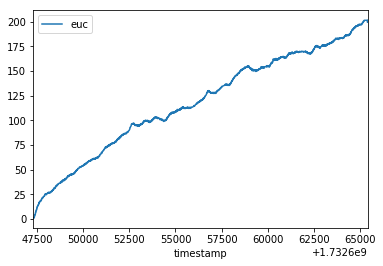

In [110]:
df_sample2.plot(x='timestamp', y='euc');